In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [273]:
df_books=pd.read_csv("./books.csv")
df_rating=pd.read_csv("./ratings.csv")
df_read=pd.read_csv("to_read.csv")

In [47]:
# the number of top 1000 best books published in the respective year 


# Top 10 Authors with Highest Average Rating

In [ ]:
# Top 10 Authors with highest average rating

authors
Bill Watterson, G.B. Trudeau                                                                                                                                                                                                4.610000
Gordon B. Hinckley                                                                                                                                                                                                          4.610000
Angie Thomas                                                                                                                                                                                                                4.620000
Eiichirō Oda                                                                                                                                                                                                                4.630000
James E. Talmage                                                            

([<matplotlib.axis.XTick at 0x292c9ba9950>,
 [Text(0, 0, 'Suzanne Collins'),
  Text(1, 0, 'J.K. Rowling, Mary GrandPré'),
  Text(2, 0, 'Stephenie Meyer'),
  Text(3, 0, 'Harper Lee'),
  Text(4, 0, 'F. Scott Fitzgerald'),
  Text(5, 0, 'John Green'),
  Text(6, 0, 'J.R.R. Tolkien'),
  Text(7, 0, 'J.D. Salinger'),
  Text(8, 0, 'Dan Brown'),
  Text(9, 0, 'Jane Austen')])

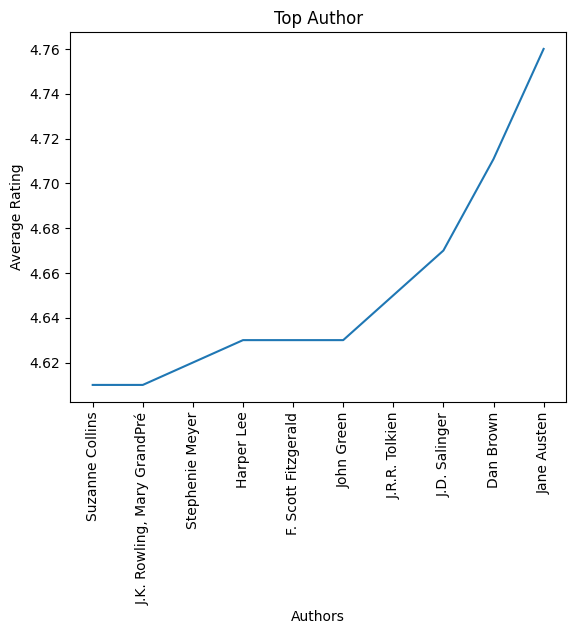

In [274]:

c=df_books[(df_books["average_rating"]>=4.7)]
# print(c)
author=df_books.authors.unique()
x=df_books.groupby("authors").average_rating.mean()

x=x.sort_values().tail(10)
# print(x)
plt.plot(x)
plt.title("Top Author")
plt.xlabel("Authors")
plt.ylabel("Average Rating")

plt.xticks(range(0,10,1),[str(i) for i in author[0:10]], rotation=90)

# Most used languages in books


ara         64
en-GB      257
en-US     2070
eng       6341
others     184
dtype: int64


C:\Users\omgup\AppData\Local\Temp\ipykernel_13800\2195681524.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x=x1.append(x2)


Text(0.5, 1.0, 'Most used Language_code in books')

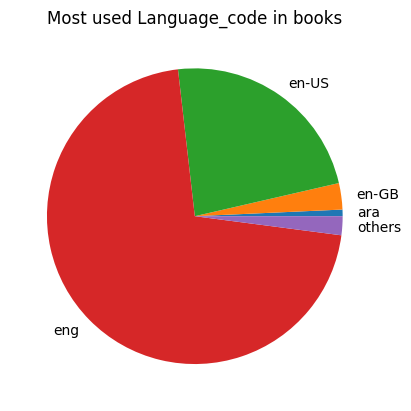

In [276]:

x=df_books.groupby(["language_code"]).language_code.apply(lambda i : len(i))
# avg_ratings_by_language = df_books.groupby('language_code')['average_rating'].mean()
# print(avg_ratings_by_language)
x1=x.sort_values().tail(4)
x2=x.sort_values().head(len(x)-4)
x2=pd.Series(x2.sum(),index=["others"])
x=x1.append(x2)
print(x)

mylabels=x.index
# print(mylabels)
plt.pie(x,labels=mylabels)
plt.title("Most used Language_code in books")

# the average rating of books given that the books are top 5 mostly readed books by User

10                 The Kite Runner
12                            1984
46                  The Book Thief
112                       Catch-22
142    All the Light We Cannot See
Name: title, dtype: object


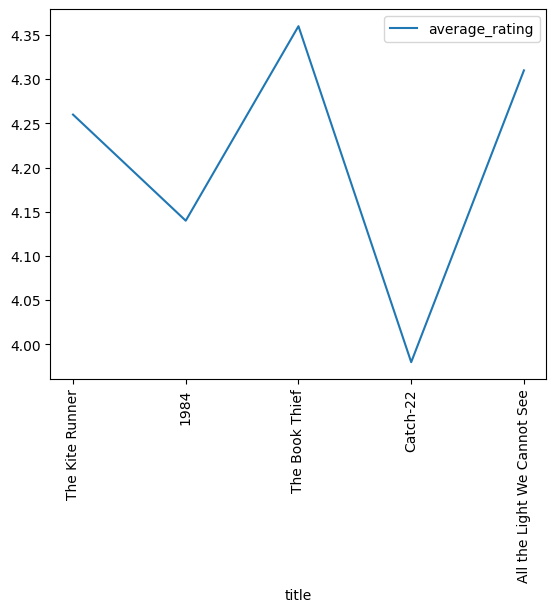

In [296]:
# the average rating of books given that the books are top 5 mostly readed books by User


df_books_read=pd.merge(df_books,df_read)


x=df_read.groupby("book_id").book_id.count()

x=x.sort_values(ascending=False)

n=5
x=x.head(n)
x=df_books[df_books["book_id"].isin(x.index)]

print(x["title"])
x.plot(x="title",y="average_rating",kind="line")
plt.xticks(range(0,5),rotation=90)
plt.show()
# here we can see the less rated book is readed by the users and show the hype for that book and how much it satisfied the users

# what is the probability that the book is marked to be readed given that it is from the particular author

In [293]:
# what is the probability that the book is in top 100 rated books given that it is published in the particular year


top_books=df_books.sort_values("average_rating",ascending=False).head(100)

year=2000
x = df_books[df_books['original_publication_year'] == year]
x_sort = x.sort_values(by='average_rating', ascending=False)
favourable=pd.merge(top_books,x_sort, how='inner').shape[0]
 
prob=favourable/(x_sort.shape[0])
print(prob)





0.019138755980861243
